In [92]:
# Example code, defines a class that implements a low-pass single-pole filter.
# https://fiiir.com/
# Configuration.
decay = 0.9999

class LowPassSinglePole:
    def __init__(self, decay):
        self.b = 1 - decay
        self.y = 0
    def filter(self, x):
        self.y += self.b * (x - self.y)
        return self.y

low_pass_single_pole = LowPassSinglePole(decay)

# Apply the filter function for each new input sample x, resulting in a new
# output sample y of the filtered signal:
# y = low_pass_single_pole.filter(x)

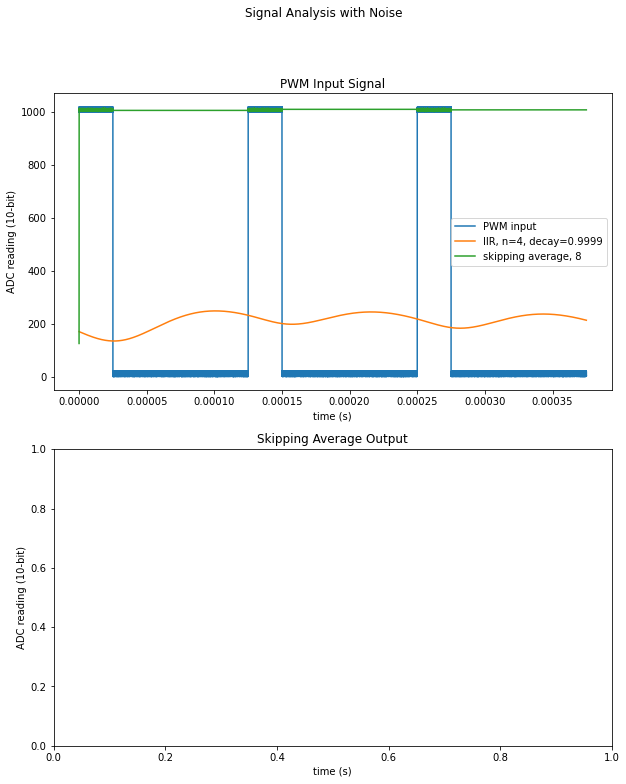

In [95]:
from SkippingAverage import SkippingAverage
import matplotlib.pyplot as plt
from random import random
from scipy import signal
import numpy as np

# =================

sampling_rate = 115000

pwm_freq = 8000
amplitude = 1000
duty_cycle = 0.2

noise_p2p = 20
noise_floor = 50

cycles = 3
iir_n = 4

# =================

# build original PWM signal
end_time = 1/pwm_freq * cycles
t = np.linspace(0, end_time, sampling_rate, endpoint=False)
sig = amplitude/2 + amplitude/2 * signal.square(2 * np.pi * pwm_freq * t, duty=duty_cycle)

# init filters
s8 = SkippingAverage(3, noise_floor)
savg8 = []
iir = []

# add noise to signal
for (i, sample) in enumerate(sig):
    sig[i] = sample + random() * noise_p2p

# build moving averages
for sample in sig:
    savg8.append(s8.out(int(sample)))
    iir.append(low_pass_single_pole.filter(sample))

# build reference IIR filter 
for stage in range(0, iir_n - 1):
    for (i, sample) in enumerate(iir):
        iir[i] = low_pass_single_pole.filter(sample)

# plot signals
fig, axs = plt.subplots(2)
fig.suptitle('Signal Analysis with Noise')

axs[0].set_ylabel("ADC reading (10-bit)")
axs[1].set_ylabel("ADC reading (10-bit)")
axs[0].set_xlabel("time (s)")
axs[1].set_xlabel("time (s)")

axs[0].set_title("PWM Input Signal")
axs[1].set_title("Skipping Average Output")

axs[0].plot(t, sig, label="PWM input")
axs[0].plot(t, iir, label="IIR, n={}, decay={}".format(iir_n, decay))
axs[0].plot(t, savg8, label="skipping average, 8")

axs[0].legend()

plt.rcParams['figure.figsize'] = [10, 12]
plt.show()